# Pandas 의 연산

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
titanic=sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 그룹화

In [4]:
# 필요한 컬럼 골라내기
df=titanic[['age','sex','class','fare','survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [5]:
grouped=df.groupby(['class'])
grouped

In [6]:
print(dir(grouped)) # iter 의 여부를 파악 - for 문을 사용할 수 있는지에 대한 여부를 판단.
for key,group in grouped: # 그룹의 키와 그룹을 따로 뺄 수 있다. 
    print(key)

['__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_accessors', '_agg_examples_doc', '_agg_general', '_agg_py_fallback', '_aggregate_frame', '_aggregate_item_by_item', '_aggregate_with_numba', '_apply_allowlist', '_apply_filter', '_apply_to_column_groupbys', '_ascending_count', '_bool_agg', '_choose_path', '_concat_objects', '_constructor', '_cumcount_array', '_cython_agg_general', '_cython_transform', '_define_paths', '_descending_count', '_dir_additions', '_dir_deletions', '_fill', '_get_cythonized_result', '_get_data_to_aggregate', '_get_

/var/folders/jv/jrhq9b3j1r71dg847_hrmn_m0000gn/T/ipykernel_83512/1679301803.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key,group in grouped: # 그룹의 키와 그룹을 따로 뺄 수 있다.


In [7]:
print(grouped.mean())

              age       fare  survived
class                                 
First   38.233441  84.154687  0.629630
Second  29.877630  20.662183  0.472826
Third   25.140620  13.675550  0.242363


/var/folders/jv/jrhq9b3j1r71dg847_hrmn_m0000gn/T/ipykernel_83512/2109118273.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(grouped.mean())


In [8]:
# 개별 그룹 가져오기
group1=grouped.get_group('First')
group1

,age,sex,class,fare,survived
1,38.0,female,First,71.2833,1
3,35.0,female,First,53.1000,1
6,54.0,male,First,51.8625,0
11,58.0,female,First,26.5500,1
23,28.0,male,First,35.5000,1
...,...,...,...,...,...
871,47.0,female,First,52.5542,1
872,33.0,male,First,5.0000,0
879,56.0,female,First,83.1583,1
887,19.0,female,First,30.0000,1


In [9]:
grouped_two=df.groupby(['class','sex']) # 키가 2개 들어가게 됨. 
for key,group in grouped_two:
    print(key)

('First', 'female')
('First', 'male')
('Second', 'female')
('Second', 'male')
('Third', 'female')
('Third', 'male')


## 집계 함수 사용

In [13]:
print(grouped.std())
print(grouped['fare'].std()) # 그룹별 std 값
print(grouped.fare.std()) # . 을 이용해서 접근할 때는 문자열이어야 한다. 

              age       fare  survived
class                                 
First   14.802856  78.380373  0.484026
Second  14.001077  13.417399  0.500623
Third   12.495398  11.778142  0.428949
class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64
class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64


/var/folders/jv/jrhq9b3j1r71dg847_hrmn_m0000gn/T/ipykernel_83512/2609684358.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(grouped.std())


## 사용자 정의 함수

In [17]:
# 사용자 정의 함수
# group 에 agg 를 이용해서 적용하게 되면 매개변수로 각 그룹이 대입되는 구조.
def f(group):
    return (group.max(),group.min())

agg_f=grouped.agg(f)

print(agg_f)

                 age             sex             fare survived
class                                                         
First   (80.0, 0.92)  (male, female)  (512.3292, 0.0)   (1, 0)
Second  (70.0, 0.67)  (male, female)      (73.5, 0.0)   (1, 0)
Third   (74.0, 0.42)  (male, female)     (69.55, 0.0)   (1, 0)


In [33]:
# 함수를 2개 적용할 때. 
agg_two=grouped.agg([min,max])
agg_two

# 컬럼마다 다른 함수 적용
agg_two=grouped.agg({"age":[min,max],"sex":[max]})
agg_two

age         sex
         min   max   max
class                   
First   0.92  80.0  male
Second  0.67  70.0  male
Third   0.42  74.0  male

In [35]:
# 셀단위로 함수 적용 -> transform 이나 apply 사용
def z_score(x):
    return (x-x.mean())/x.std()

age_zscore=grouped.age.transform(z_score)
print(age_zscore.head())



# SQL 의 Having(GroupBY 이후의 조건- 그룹화한 항목의 필터링) 을 만들고자 할 때는 filter 함수를 이용. 
# 그룹화 한 항목의 필터링은 그룹의 집계함수를 이용해서 필터링을 수행
# 행의 개수가 300개가 넘는 데이터만 추출.
group_filter=grouped.filter(lambda x: len(x)>300)
group_filter.head()


0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
Name: age, dtype: float64


,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0


## MultiIndex
* 인덱스가 1개가 아니라 여러개인 것
* 2개 이상의 항목으로 그룹화를 하면 멀티 인덱스가 만들어진다.
* 멀티 인덱스로 구성된 데이터에 직접 접근을 하고자 할 때는 
```python 
df.loc[(첫번째 그룹 index, 두번째 그룹의 index...)]
````
혹은 
```python
xs( 첫번째 그룹 인덱스, level=두번째 그룹 인덱스)
```

In [40]:
# 2개의 컬럼으로 그룹화 - 멀티인덱스 생성

grouped=df.groupby(['class','sex'])

# First 클래스이고 sex 가 male 인 데이터만 골라오기
gdf=grouped.mean()
print(gdf.loc[('First','male')])
print(gdf.xs('male',level="sex"))



age         41.281386
fare        67.226127
survived     0.368852
Name: (First, male), dtype: float64
              age       fare  survived
class                                 
First   41.281386  67.226127  0.368852
Second  30.740707  19.741782  0.157407
Third   26.507589  12.661633  0.135447


## Pivot Table

In [43]:
# help(pd.pivot_table)
print(pd.pivot_table(df,index="sex",columns="class",values='age',aggfunc='mean'))

class       First     Second      Third
sex                                    
female  34.611765  28.722973  21.750000
male    41.281386  30.740707  26.507589


### 서울시 구별 인구수와 CCTV 개수의 탐색

In [45]:
import pandas as pd
import numpy as np

# 시각화 패키지
import matplotlib.pyplot as plt

# 한글 출력을 위한 패키지
import platform
from matplotlib import font_manager,rc

if platform.system()=='Darwin':
	rc('font',family='AppleGothic')
elif platform.system()=='Windows':
	font_name=font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
	rc('font',family=font_name)

In [47]:
cctv=pd.read_excel('./data 3/cctv.xlsx')
cctv

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71


In [49]:
# 데이터 구조 확인
cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [55]:
# pop.txt 는 처음 두개의 행은 의미가 없다. 
# 한글을 포함하고 있고 구분 기호는 Tab
# 1000단위 구분기호가 존재한다. 

pop=pd.read_csv('./data 3/pop.txt',skiprows=2,delimiter='\t',thousands=',')
pop

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2021.2/4,합계,4405638,9795426,4756178,5039248,9565990,4649442,4916548,229436,106736,122700,2.17,1576971
1,2021.2/4,종로구,73525,155106,75009,80097,146029,70985,75044,9077,4024,5053,1.99,27605
2,2021.2/4,중구,62897,132259,64526,67733,123016,60019,62997,9243,4507,4736,1.96,23980
3,2021.2/4,용산구,111650,240665,116858,123807,226378,108948,117430,14287,7910,6377,2.03,38884
4,2021.2/4,성동구,134542,295767,143927,151840,289162,141042,148120,6605,2885,3720,2.15,45591
5,2021.2/4,광진구,166957,355306,170624,184682,342481,165233,177248,12825,5391,7434,2.05,50815
6,2021.2/4,동대문구,166372,352259,172865,179394,338040,167335,170705,14219,5530,8689,2.03,61262
7,2021.2/4,중랑구,185073,394679,194556,200123,389972,192688,197284,4707,1868,2839,2.11,70172
8,2021.2/4,성북구,194364,443206,212849,230357,433658,209210,224448,9548,3639,5909,2.23,73568
9,2021.2/4,강북구,144525,306093,148824,157269,302645,147542,155103,3448,1282,2166,2.09,63383


#### 컬럼 이름 변경

In [57]:
cctv.rename(columns={cctv.columns[0]:'구별'},inplace=True)
pop.rename(columns={pop.columns[1]:'구별'},inplace=True)

# cctv 의 구 이름에는 중간에 공백이 존재하고 pop 은 구 이름에는 공백이 없음. 

gu=[]
for x in cctv['구별']:
    gu.append(x.replace(' ',''))
cctv['구별']=gu
cctv


,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노원구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71


#### 불필요한 열과 행 제거

In [58]:
# pop 데이터에서 기간, 구별, 계, 남자, 여자 열만 필요 - 열 선택 (제거)
pop=pop[['기간','구별','계','남자','여자']]

# pop 데이터의 첫번째 행은 전체 데이터의 집계라서 불필요 - 행 제거 
pop.drop([0],inplace=True)

# 새로운 열을 추가 - 없는 열 이름에 데이터를 대입하면 된다.
pop['여성비율']=pop['여자']/pop['계']*100
pop

/var/folders/jv/jrhq9b3j1r71dg847_hrmn_m0000gn/T/ipykernel_83512/2291169558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop.drop([0],inplace=True)
/var/folders/jv/jrhq9b3j1r71dg847_hrmn_m0000gn/T/ipykernel_83512/2291169558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop['여성비율']=pop['여자']/pop['계']*100


,기간,구별,계,남자,여자,여성비율
1,2021.2/4,종로구,155106,75009,80097,51.640169
2,2021.2/4,중구,132259,64526,67733,51.212394
3,2021.2/4,용산구,240665,116858,123807,51.443708
4,2021.2/4,성동구,295767,143927,151840,51.337708
5,2021.2/4,광진구,355306,170624,184682,51.978295
6,2021.2/4,동대문구,352259,172865,179394,50.926733
7,2021.2/4,중랑구,394679,194556,200123,50.705257
8,2021.2/4,성북구,443206,212849,230357,51.975154
9,2021.2/4,강북구,306093,148824,157269,51.379483
10,2021.2/4,도봉구,322419,156843,165576,51.354294


#### merge - 데이터 결합

In [65]:
df=pd.merge(pop,cctv,on='구별') # on 에 결합할 열 작성
df


,기간,구별,계,남자,여자,여성비율,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,2021.2/4,종로구,155106,75009,80097,51.640169,1471,8.0,7.0,599.0,132,195,148,281,101
1,2021.2/4,중구,132259,64526,67733,51.212394,1544,25.0,165.0,114.0,80,245,270,317,328
2,2021.2/4,용산구,240665,116858,123807,51.443708,2063,1279.0,152.0,201.0,107,102,89,60,73
3,2021.2/4,성동구,295767,143927,151840,51.337708,2679,665.0,109.0,118.0,101,258,201,933,294
4,2021.2/4,광진구,355306,170624,184682,51.978295,1581,470.0,42.0,83.0,87,64,21,468,346
5,2021.2/4,동대문구,352259,172865,179394,50.926733,2003,NaN,NaN,NaN,1326,111,233,136,197
6,2021.2/4,중랑구,394679,194556,200123,50.705257,1068,NaN,NaN,NaN,770,102,121,66,9
7,2021.2/4,성북구,443206,212849,230357,51.975154,3003,779.0,84.0,304.0,241,279,388,285,643
8,2021.2/4,강북구,306093,148824,157269,51.379483,1265,243.0,88.0,141.0,74,145,254,1,319
9,2021.2/4,도봉구,322419,156843,165576,51.354294,858,197.0,66.0,8.0,185,59,155,117,71


#### 불필요한 컬럼 제거
* 2011년 이전, 2012,13,14,15,16,17년, 기간 열을 삭제

In [66]:
# del 을 이용. - pandas 에서는 비추. 
del df['2011년 이전']
for i in range(2012,2018):
    year=f'{i}년'
    del df[year]
del df['기간']
print(df)

      구별       계      남자      여자       여성비율    소계  2018년
0    종로구  155106   75009   80097  51.640169  1471    101
1     중구  132259   64526   67733  51.212394  1544    328
2    용산구  240665  116858  123807  51.443708  2063     73
3    성동구  295767  143927  151840  51.337708  2679    294
4    광진구  355306  170624  184682  51.978295  1581    346
5   동대문구  352259  172865  179394  50.926733  2003    197
6    중랑구  394679  194556  200123  50.705257  1068      9
7    성북구  443206  212849  230357  51.975154  3003    643
8    강북구  306093  148824  157269  51.379483  1265    319
9    도봉구  322419  156843  165576  51.354294   858     71
10   노원구  520005  250532  269473  51.821232  1906    156
11   은평구  479409  229241  250168  52.182583  2962    367
12  서대문구  317699  150608  167091  52.594122  2121    194
13   마포구  379984  177998  201986  53.156449  1935    195
14   양천구  454288  222538  231750  51.013894  2775    830
15   강서구  582995  280822  302173  51.831148  1617    254
16   구로구  424582  210936  21364

#### 인덱스 재설정

In [ ]:
df.set_index('구별',inplace=True)

In [78]:
df

,계,남자,여자,여성비율,소계,2018년
구별,,,,,,
종로구,155106,75009,80097,51.640169,1471,101
중구,132259,64526,67733,51.212394,1544,328
용산구,240665,116858,123807,51.443708,2063,73
성동구,295767,143927,151840,51.337708,2679,294
광진구,355306,170624,184682,51.978295,1581,346
동대문구,352259,172865,179394,50.926733,2003,197
중랑구,394679,194556,200123,50.705257,1068,9
성북구,443206,212849,230357,51.975154,3003,643
강북구,306093,148824,157269,51.379483,1265,319


#### Pandas 의 시각화 기능을 이용해 소계에 대한 막대 그래프 그리기

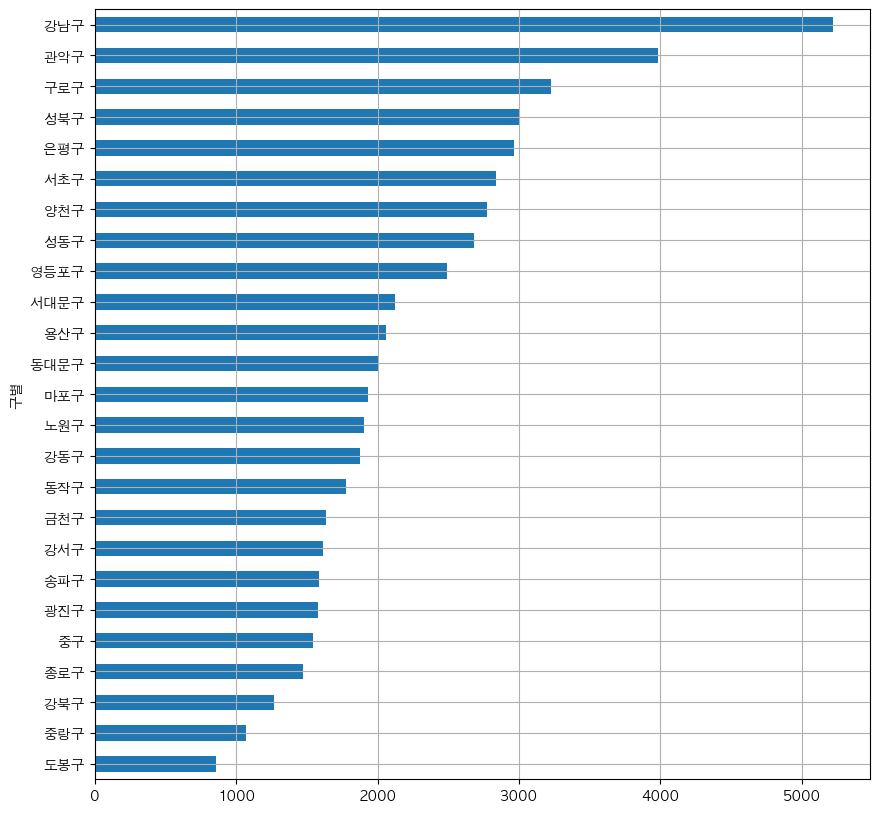

In [81]:
df['소계'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()	

#### CCTV 비율 시각화

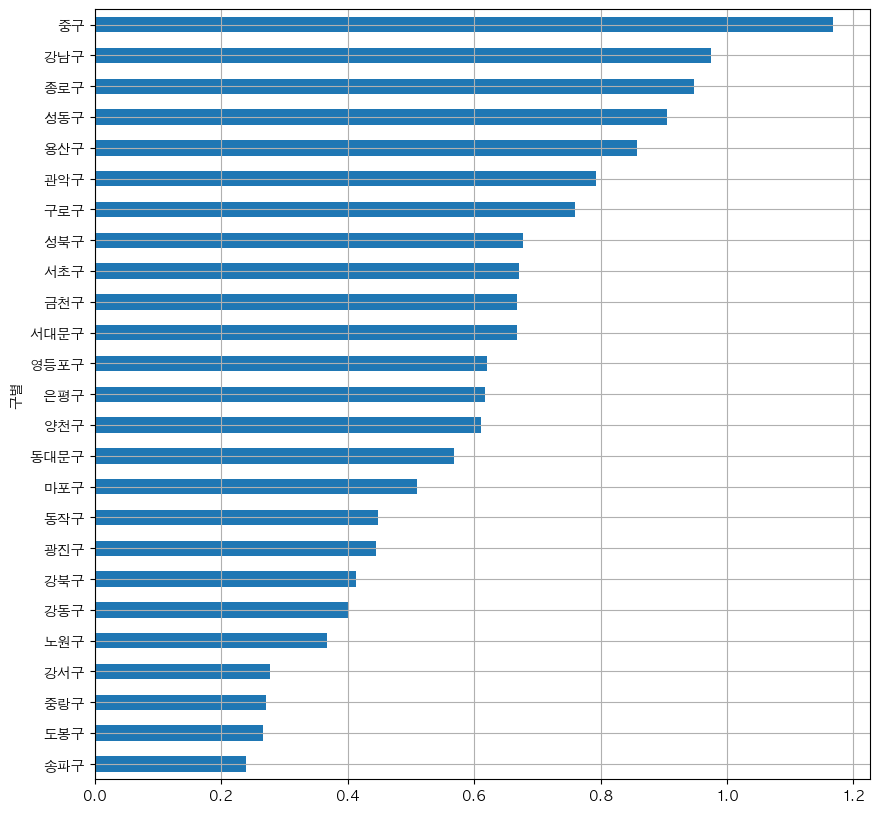

In [80]:
df['cctv비율']=(df['소계']/df['계']*100)
df['cctv비율'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()	

#### 인구수와 CCTV 개수 사이에 연관성이 있는지 확인- 산점도가 유용
* matplotlib 에서 제공하는 시각화를 활용

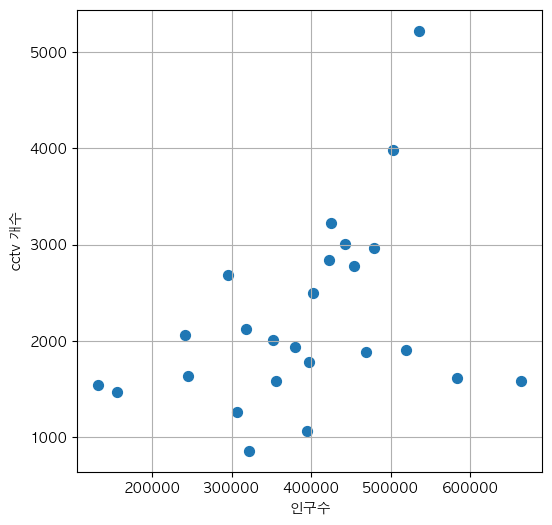

In [83]:
plt.figure(figsize=(6,6))
plt.scatter(df['계'],df['소계'],s=50)
plt.xlabel('인구수')
plt.ylabel('cctv 개수')
plt.grid()
plt.show()
# 산점도를 그리는 경우, 방향성과 그룹화 가능성을 확인한다. 

#### 추세선 그리기

In [84]:
# 회귀식 
fp1=np.polyfit(df['계'],df['소계'],1)
f1=np.poly1d(fp1)
print(f1) # 기울기 x + 절편

 
0.002892 x + 1087


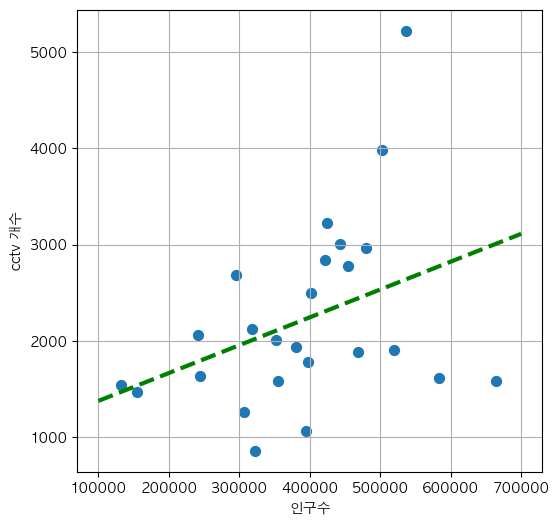

In [88]:
fx=np.linspace(100000,700000,10)
plt.figure(figsize=(6,6))
plt.scatter(df['계'],df['소계'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('인구수')
plt.ylabel('cctv 개수')
plt.grid()
plt.show()
# 산점도를 그리는 경우, 방향성과 그룹화 가능성을 확인한다. 

#### 오차 출력하기

 
0.002892 x + 1087


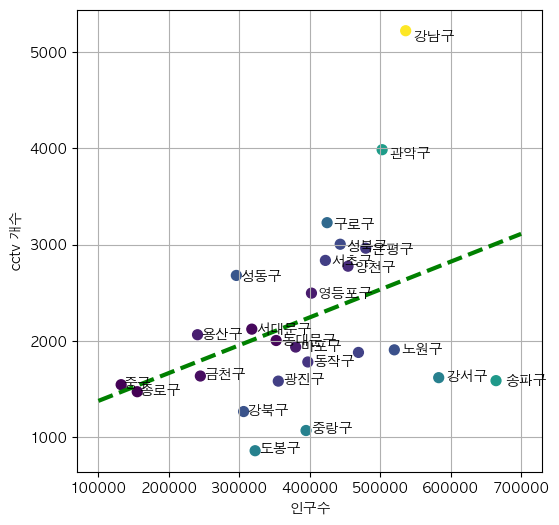

In [94]:
# 회귀식 
fp1=np.polyfit(df['계'],df['소계'],1)
f1=np.poly1d(fp1)
print(f1) # 기울기 x + 절편
fx=np.linspace(100000,700000,10)
df['오차']=np.abs(df['소계']-f1(df['계']))
plt.figure(figsize=(6,6))
plt.scatter(df['계'],df['소계'],c=df['오차'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
for n in range(24):
    plt.text(df['계'][n]*1.02,df['소계'][n]*0.98,df.index[n],fontsize=10)
# 계 - x 좌표 , 소계 - y 좌표
plt.xlabel('인구수')
plt.ylabel('cctv 개수')
plt.grid()
plt.show()
# 산점도를 그리는 경우, 방향성과 그룹화 가능성을 확인한다. 

## Choropleth (단계구분도)
* 지도에 색상이나 마커를 이용해서 크기를 표시하는 시각화 방법
* 카토그램과 다른 점은 영역의 크기를 왜곡하지 않는다.

## 데이터 구조화

In [96]:
# 멀티 인덱스로 사용할 데이터 생성
mul_index=pd.MultiIndex.from_tuples([('cust_1','2015'),('cust_1','2016'),('cust_2','2015'),('cust_2','2016')])
data=pd.DataFrame(data=np.arange(16).reshape(4,4),index=mul_index,columns=['prd_1','prd_2','prd_3','prd_4'],dtype='int')
data

prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15

In [100]:
data_stacked=data.stack()
data_stacked # col 이 하위 index 로 바뀜.

cust_1  2015  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2016  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2015  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2016  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int64

In [104]:
data.loc['cust_2','prd_4']=np.nan
data_stacke=data.stack(dropna=False)
print(data_stacke)

cust_1  2015  prd_1     0.0
              prd_2     1.0
              prd_3     2.0
              prd_4     3.0
        2016  prd_1     4.0
              prd_2     5.0
              prd_3     6.0
              prd_4     7.0
cust_2  2015  prd_1     8.0
              prd_2     9.0
              prd_3    10.0
              prd_4     NaN
        2016  prd_1    12.0
              prd_2    13.0
              prd_3    14.0
              prd_4     NaN
dtype: float64


In [106]:
print(data_stacked.unstack(level=0))
data_stacked

            cust_1  cust_2
2015 prd_1       0       8
     prd_2       1       9
     prd_3       2      10
     prd_4       3      11
2016 prd_1       4      12
     prd_2       5      13
     prd_3       6      14
     prd_4       7      15


cust_1  2015  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2016  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2015  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2016  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int64

### 시계열 데이터의 재구조화

In [115]:
data=pd.read_csv('./data 3/macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [116]:
# 시계열 인덱스 생성
periods=pd.PeriodIndex(year=data['year'],quarter=data['quarter'],name='date')
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203)

In [118]:
columns=pd.Index(['realgdp','infl','unemp'],name="item") # 컬럼명 인덱스 형태로 뽑아내기.
data=data.reindex(columns=columns)
data

item,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2
...,...,...,...
198,13324.600,-3.16,6.0
199,13141.920,-8.79,6.9
200,12925.410,0.94,8.1
201,12901.504,3.37,9.2


In [121]:
data.index=periods.to_timestamp('D','end') # 쿼터의 마지막 날을 세부 데이터로 설정
data

item,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,13324.600,-3.16,6.0
2008-12-31 23:59:59.999999999,13141.920,-8.79,6.9
2009-03-31 23:59:59.999999999,12925.410,0.94,8.1


In [122]:
# 날짜를 데이터로 사용
ldata=data.stack().reset_index().rename(columns={0:'value'})
ldata

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370
605,2009-06-30 23:59:59.999999999,unemp,9.200
606,2009-09-30 23:59:59.999999999,realgdp,12990.341
607,2009-09-30 23:59:59.999999999,infl,3.560


In [123]:
pivoted=ldata.pivot('date','item','value')
pivoted

/var/folders/jv/jrhq9b3j1r71dg847_hrmn_m0000gn/T/ipykernel_83512/3030080752.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted=ldata.pivot('date','item','value')


item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [127]:
# melt - 뒤의 3개의 컬럼을 합쳐서 1개의 컬럼으로 제작
data=pd.DataFrame({'cust_id':[1,2,3,4],'prod_id':['a','b','c','d'],'pch_cnt':[1,2,3,4],'pch_price':[100,200,300,400],'pch_amt':[10,20,30,40]})
result=pd.melt(data,id_vars=['cust_id','prod_id'])
result

,cust_id,prod_id,variable,value
0,1,a,pch_cnt,1
1,2,b,pch_cnt,2
2,3,c,pch_cnt,3
3,4,d,pch_cnt,4
4,1,a,pch_price,100
5,2,b,pch_price,200
6,3,c,pch_price,300
7,4,d,pch_price,400
8,1,a,pch_amt,10
9,2,b,pch_amt,20


In [136]:
# melt - 뒤의 3개의 컬럼을 합쳐서 1개의 컬럼으로 제작
data=pd.DataFrame({'id':[1,1,1,2,2,3],'fac_1':['a','a','a','b','b','b'],'fac_2':['d','d','d','c','c','d']})
# fac1과 fac2 의 빈도분석

print(pd.crosstab(data['fac_1'],data['fac_2'],rownames=['사실'],colnames=['거짓'],normalize=True))

pd.crosstab(data.id,[data['fac_1'],data['fac_2']])

거짓         c         d
사실                    
a   0.000000  0.500000
b   0.333333  0.166667


fac_1  a  b   
fac_2  d  c  d
id            
1      3  0  0
2      0  2  0
3      0  0  1